In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from postprocess_utils import *
import pandas as pd
import sqlalchemy

In [3]:
import pickle

In [4]:
with open('alpha_datalist_expanded.dat', 'rb') as f:
    alpha_datalist = pickle.load(f)

In [5]:
alpha_datalist = pd.DataFrame(alpha_datalist)

In [6]:
# Loaded from other notebook
%store -r sigmoid_df

#### Takeaways 1-3

In [7]:
# Takeaways 1-3: Ideal selection performance for sparse settings is achieved by Elastic Net with 
# empirical Bayes selection and UoI/SCAD/MCP with BIC, transitioning to cross-validated algorithms in dense
# settings

# Plot: Overlay the sigmoid saturation levels vs. sparsity averaged over case 1/2 for the algorithms for the 

# Plot: In the 'ideal case', cross-validated SCAD/MCP are robust, as is BIC and gMDL. Co-plot these

In [8]:
sparsity = np.unique(sigmoid_df['sparsity'].values)

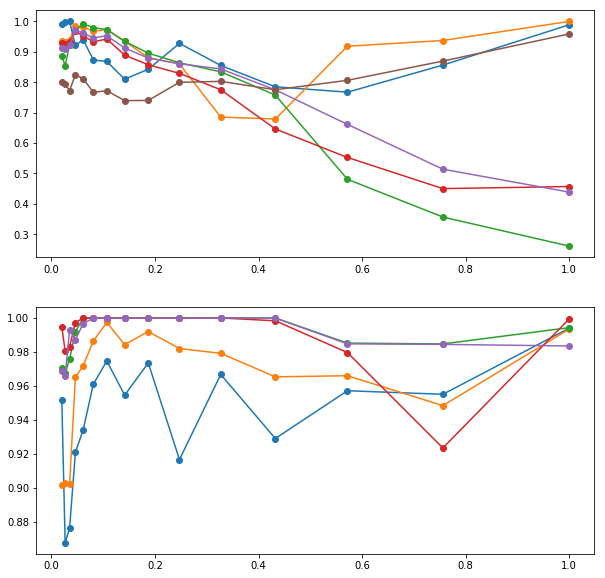

In [9]:
# Plot 1: Take case 1 and case 2 and plot the average saturation parameter across sparsity for 
# (1) Elastic Net with empirical Bayes selection
# (2) SCAD/MCP/UoI with BIC
# (3) representative cross-validated algorithm

fig, ax = plt.subplots(2, 1, figsize = (10, 10))

df1a = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='empirical_bayes',
                       df='EN')
df1b = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='empirical_bayes',
                       df='SCAD')

df2a = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='BIC', df='UoI Lasso')
df2b = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='BIC', df='SCAD')
df2c = apply_df_filters(sigmoid_df, caseno=[1, 2], selection_method='BIC', df='MCP')
df3 = apply_df_filters(sigmoid_df, caseno=[1,2], selection_method='CV', df='SCAD')

dframes = [df1a, df1b, df2a, df2b, df2c, df3]
Y = []

for i, dframe in enumerate(dframes):
    Y.append([])
    
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(min(1, df_s.iloc[row]['coefs'][0] + df_s.iloc[row]['coefs'][-1]))
                
        Y[i].append(np.mean(xx))        
        
    ax[0].plot(sparsity, Y[i], '-o')
    
df1a = apply_df_filters(sigmoid_df, caseno=3, selection_method='CV', df='SCAD')
df1b = apply_df_filters(sigmoid_df, caseno=3, selection_method='CV', df='MCP')

df2 = apply_df_filters(sigmoid_df, caseno=3, selection_method='BIC', df='UoI Lasso')

df3a = apply_df_filters(sigmoid_df, caseno=3, selection_method='empirical_bayes', df='UoI Lasso')
df3b = apply_df_filters(sigmoid_df, caseno=3, selection_method='gMDL', df='UoI Lasso')

dframes = [df1a, df1b, df2, df3a, df3b]
Y = []

for i, dframe in enumerate(dframes):
    Y.append([])
    
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(min(1, df_s.iloc[row]['coefs'][0] + df_s.iloc[row]['coefs'][-1]))
                
        Y[i].append(np.mean(xx))        
        
    ax[1].plot(sparsity, Y[i], '-o')

In [ ]:
# Keep in mind this is a low correlation regime. We can use the previous plots, restricted to just a few of 
# the best selection methods above, that in highly correlated designs the adaptive methods do not behave well

#### Takeaways 4-5

In [ ]:
# Subplot 1: Demonstrate low sensitivity of Elastic Net + AIC and Lasso + BIC to correlations
# Subplot 1b: Illustrate how this does not lead to good selection except in dense cases
## ^^ This can be left to the supplementary information (not a core point)

# Subplot 2: Highlight the broad phase change in sensitivity to correlations between extremely sparse models
# and everything else (can treat all cases on the same footing here)

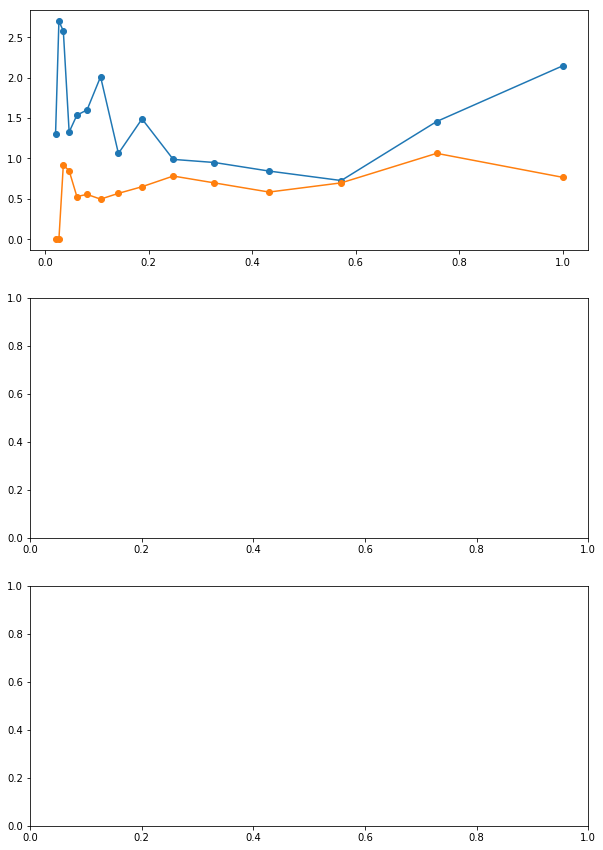

In [10]:
fig, ax = plt.subplots(figsize = (10, 7.5))

# Average together everything else
df2 = apply_df_filters(sigmoid_df, caseno=[1, 2, 3], selection_method=['AIC', 'BIC', 'gMDL', 'empirical_bayes',
                                                                       'CV'], df=['UoI Lasso', 'SCAD', 'MCP', 'Lasso'])

dframes = [df1a, df1b, df2]
Y = []

for i, dframe in enumerate(dframes):
    Y.append([])
    
    for j, s in enumerate(sparsity):
        df_s = apply_df_filters(dframe, sparsity=s)
        xx = []
        for row in range(df_s.shape[0]):
            if not np.any(np.isnan(df_s.iloc[row]['coefs'])):
                xx.append(df_s.iloc[row]['coefs'][1])
                
        Y[i].append(np.mean(xx))        
        
    ax[0].plot(sparsity, Y[i], '-o')

#### Takeaway 6

In [ ]:
# Plot: Take the oracle and the argmax over (algorithm, selection method) for sparsity vs. correlation for
# the three cases

# Subplot: plot heatmaps of the selection accuracy
# Subplot: As a function of sparsity, plot the location of the transition parameter (oracle and argmax)

#### Takeaway 7

In [ ]:
# Worst case scenario: Nothing is doing well - so what do you do? Elastic Net with gMDL has the highest 
# offsets